In [10]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../dask')
from gm import kernel, compute_beta, fine_grid_size, compute_w, load_data

from math import pow

epsilon = 1.e-10

## Non-uniform grid $\to$ Uniform grid

In [2]:
x = np.linspace(0,1,11)
y = np.array([1.e-2 * (i*i) for i in range(16)])

np.save('../data/x.npy', x)
np.save('../data/y.npy', y)

In [3]:
n = fine_grid_size(np.array([len(x), len(y)]), compute_w(epsilon))
ux = np.linspace(0,np.pi,n[0])
uy = np.linspace(0,np.pi,n[1])

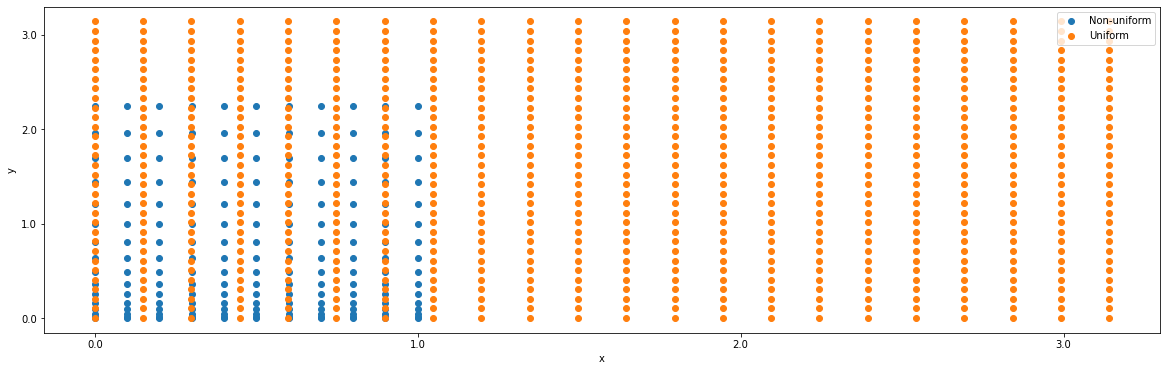

In [4]:
plt.figure(figsize=(20,6))
plt.scatter(*np.meshgrid(x,y), label='Non-uniform')
plt.scatter(*np.meshgrid(ux,uy), label='Uniform')

def labelify(*arrs):
    return np.unique(np.round(np.sort(np.concatenate(list(arrs)))[::3]))

lx = labelify(x,ux)
ly = labelify(y,uy)

plt.xticks(lx, lx)
plt.yticks(ly, ly)

plt.xlabel('x')
plt.ylabel('y')

plt.legend();

## Non-uniform function $\to$ uniform function
$$f(x,y) = \sin\left(x \frac{\pi}{12}\right) \cos\left(y \frac{\pi}{3}\right)$$

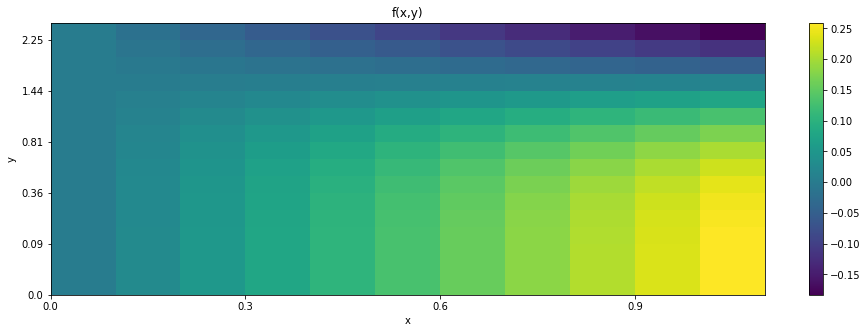

In [5]:
def fnc(x,y):
    return np.sin(x * np.pi / 12) * np.cos(y * np.pi / 3)

f = np.vstack([fnc(x, yi)[None,:] for yi in y])
np.save('../data/f.npy', f)

plt.figure(figsize=(16,5))
plt.pcolormesh(f)

plt.ylabel('y')
plt.xlabel('x')
plt.title('f(x,y)')

plt.xticks(range(0,len(x),3),np.round(x,2)[::3])
plt.yticks(range(0,len(y),3),np.round(y,2)[::3])

plt.colorbar();

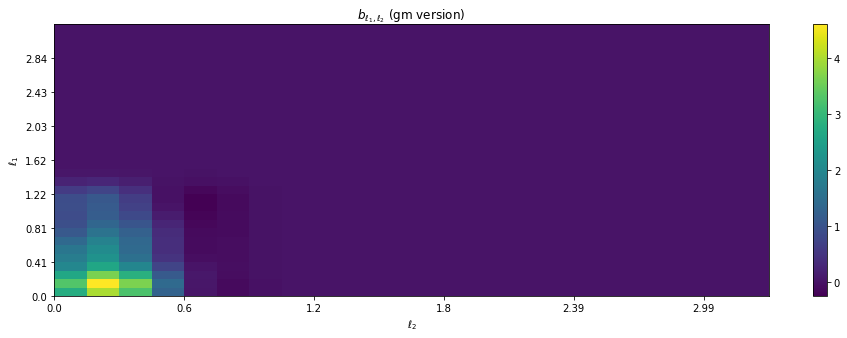

In [14]:
suffix = 'gm'
b = np.load('../data/b_{}.npy'.format(suffix))

plt.figure(figsize=(16,5))
plt.pcolormesh(b.T)
plt.colorbar()

plt.title('$b_{{\ell_1, \ell_2}}$ ({} version)'.format(suffix))
plt.xlabel('$\ell_2$')
plt.ylabel('$\ell_1$')

plt.yticks(range(0,len(uy),4), np.round(uy[::4],2));
plt.xticks(range(0,len(ux),4), np.round(ux[::4],2));

## Kernel & $\beta$

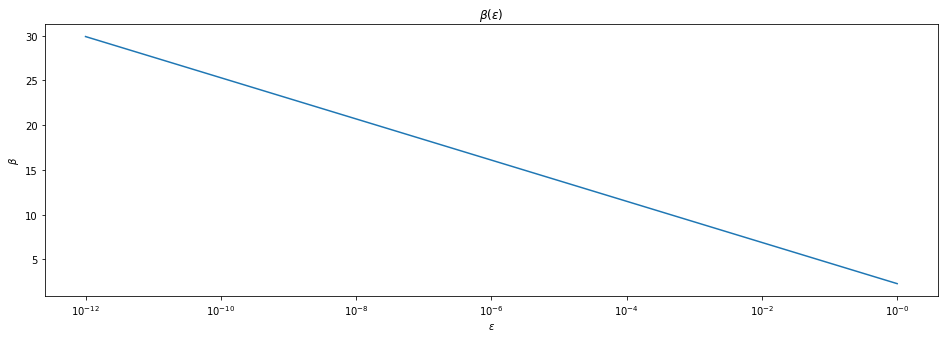

In [7]:
epsilons = np.array([pow(10,-i) for i in range(13)])
betas = np.vectorize(compute_beta)(epsilons)

plt.figure(figsize=(16,5))
plt.plot(epsilons, betas)

plt.title('$\\beta(\epsilon)$')
plt.xlabel('$\epsilon$')
plt.ylabel('$\\beta$')

labels = ['$10^{{-{}}}$'.format(i) for i in range(len(epsilons))]

plt.xscale('log')
plt.xticks(epsilons[::2], labels[::2]);
plt.show()

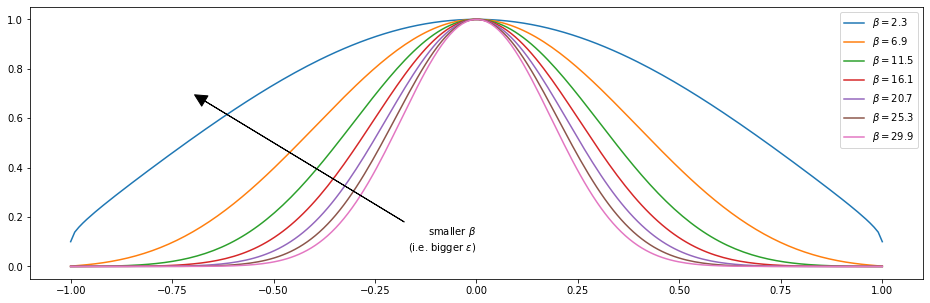

In [8]:
zs = np.linspace(-1, 1, 200)

plt.figure(figsize=(16,5))
for beta in np.round(betas[::2],2):
    plt.plot(zs, kernel(zs, beta), label='$\\beta=${}'.format(beta))
plt.legend();

plt.annotate('smaller $\\beta$\n(i.e. bigger $\epsilon$)', xy=(-0.7, 0.7),  xycoords='data',
            xytext=(0.5,0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width=0.1),
            horizontalalignment='right', verticalalignment='top',
            );

## Kernel grid ($\epsilon = 1.e-10$)

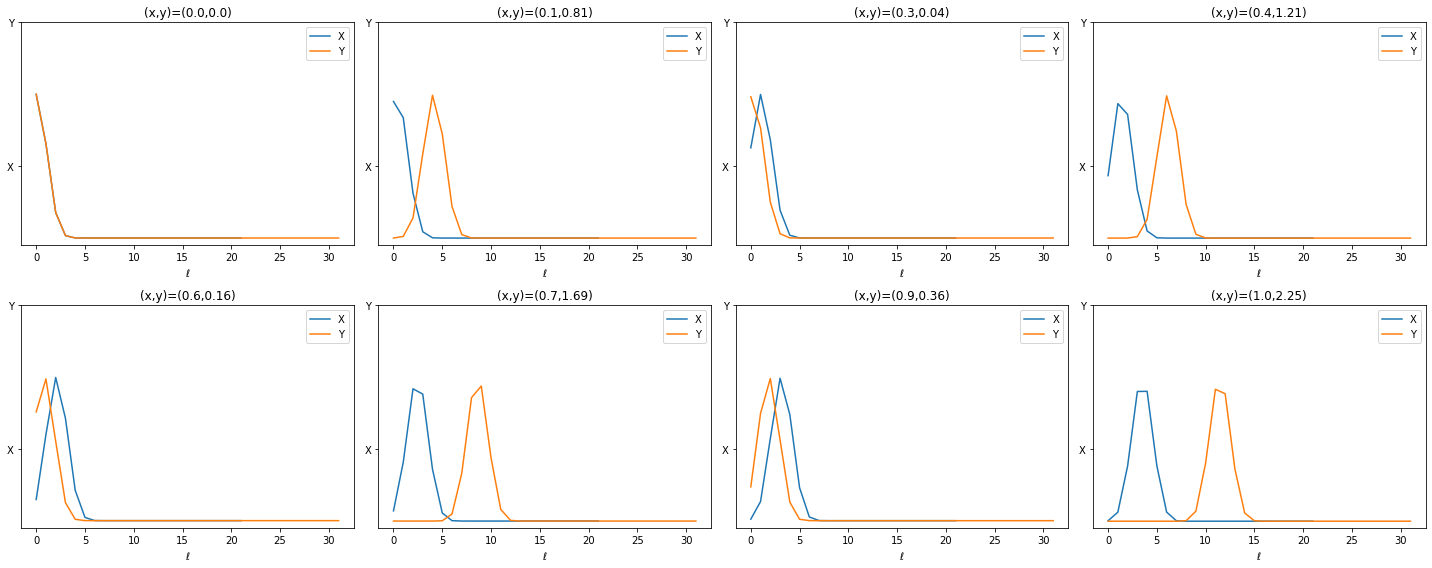

In [13]:
krn_vals = np.load('../data/krn_vals.npy')

epsilon = 1.e-10
krn_vals[:,0,n[0]:] = np.nan
krn_vals[:,1,n[1]:] = np.nan

fig = plt.figure(figsize=(20,8))

pts, _ = load_data()

for pos,i in enumerate(list(range(len(pts)))[::25]):
    plt.subplot(2,4,pos+1)
    plt.plot(krn_vals[i,0], label='X')
    plt.plot(krn_vals[i,1], label='Y')
    
    plt.title('(x,y)=({},{})'.format(*np.round(pts[i],2)))
    plt.xlabel('$\ell$')
    
    plt.legend()
    
    plt.yticks([0.5,1.5], ['X', 'Y'])
    
fig.tight_layout()
plt.show()